# Problem :
 ## Compare the speed of a library function for matrix multiplication to your own implementation of the nested loops  algorithm.


   ##     PART 1 
   ###    >  How much faster is the library on products of random n×n matricies, as a function of n as n gets large?

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time 

In [5]:
#Defining a function for matrix multiplication
def nested_loop_matmul(A, B):
    n = A.shape[0] #number of rows of A
    m = A.shape[1] #number of columns of A
    p = B.shape[1] #number of columns of B 
    # C matrix initialized as zero matrix with ( n x p ) dimension.
    C = np.zeros((n, p)) 
    for i in range(n): 
        for j in range(p) : 
            for k in range(m): 
                C[i][j] += A[i][k] * B[k][j] #CAUTION : accessing elements of B in Column-Major format
    return C

In [6]:
time_for_Loops = []
time_for_Numpy = []

In [7]:
for n in range(10,101,10):
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    st_time = time.time()
    C = nested_loop_matmul(A,B)#defined function 
    end_time = time.time()
    exec_time = end_time - st_time
    time_for_Loops.append(exec_time)
    st1_time = time.time()
    C = np.matmul(A,B)#Numpy library function 
    end1_time = time.time()
    exec1_time = end1_time - st1_time
    time_for_Numpy.append(exec1_time)
    

In [8]:
time_for_Loops

[0.0008599758148193359,
 0.010185003280639648,
 0.03991818428039551,
 0.1000056266784668,
 0.26348447799682617,
 0.3735337257385254,
 0.6961712837219238,
 1.0986685752868652,
 1.4207303524017334,
 1.7188479900360107]

In [9]:
time_for_Numpy

[0.11934256553649902,
 0.0,
 0.0,
 0.0,
 0.00815725326538086,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [10]:
data = {'Matrix dimension(n)' : range(10,101,10),
        'Time taken by nested loops(in sec)': time_for_Loops,
        'Time taken by Numpy arrays(in sec)': time_for_Numpy,
        'Difference(Loops-Numpy time)': [time_for_Loops[i] - time_for_Numpy[i] for i in range(len(time_for_Loops))]}

df = pd.DataFrame(data)
df

,Matrix dimension(n),Time taken by nested loops(in sec),Time taken by Numpy arrays(in sec),Difference(Loops-Numpy time)
0,10,0.000860,0.119343,-0.118483
1,20,0.010185,0.000000,0.010185
2,30,0.039918,0.000000,0.039918
3,40,0.100006,0.000000,0.100006
4,50,0.263484,0.008157,0.255327
5,60,0.373534,0.000000,0.373534
6,70,0.696171,0.000000,0.696171
7,80,1.098669,0.000000,1.098669
8,90,1.420730,0.000000,1.420730
9,100,1.718848,0.000000,1.718848


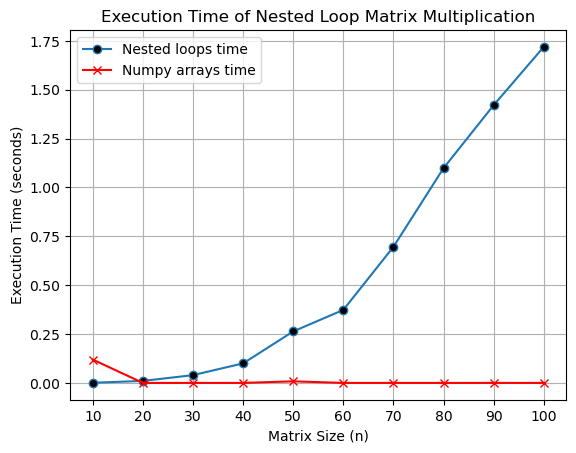

In [11]:
plt.plot(range(10, 101, 10),time_for_Loops , marker='o',markerfacecolor='Black',label="Nested loops time")
plt.plot(range(10, 101, 10),time_for_Numpy , marker='x',markerfacecolor='Black',color='Red',label="Numpy arrays time")
plt.xticks(range(10,101,10))
plt.xlabel('Matrix Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Nested Loop Matrix Multiplication')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

### Result 1 :
    From the above data and plot, 
        It is clearly visible that the time taken by the loops to perform matrix multiplication is more than that of numpy library function.

## PART 2
### > What about the product of an n×m and m×n matrix, where n << m? ( Here , I let m = 400 )
    

In [14]:
time_for_AB_Prod_nested = []
time_for_AB_Prod_Numpy  = []

In [15]:
m = 400
#I'm taking n from [21,30],which was very less than m(i.e..,400 here)
for n in range(21,31):
    A = np.random.rand(n,m)
    B = np.random.rand(m,n)
    st_time = time.time()
    C = nested_loop_matmul(A,B)#nested-loop function
    end_time = time.time()
    exec_time = end_time - st_time
    time_for_AB_Prod_nested.append(exec_time)
    st1_time = time.time()
    C = np.matmul(A,B)#Numpy library function 
    end1_time = time.time()
    exec1_time = end1_time - st1_time
    time_for_AB_Prod_Numpy.append(exec1_time)
    

In [16]:
time_for_AB_Prod_nested

[0.33635854721069336,
 0.3302726745605469,
 0.3687093257904053,
 0.39025020599365234,
 0.46196937561035156,
 0.5374319553375244,
 0.5653009414672852,
 0.6448819637298584,
 0.6289551258087158,
 0.7509596347808838]

In [17]:
time_for_AB_Prod_Numpy

[0.012177228927612305,
 0.0,
 0.0,
 0.0,
 0.020566225051879883,
 0.0,
 0.0,
 0.0,
 0.0010898113250732422,
 0.0]

In [18]:
data = {'Matrix dimension(n)' : range(21,31),
        'Time taken by A x B Product nested (in sec)': time_for_AB_Prod_nested,
       'Time taken by A x B Product Numpy (in sec)': time_for_AB_Prod_Numpy,
       'Difference( nested - Numpy ) ' : [time_for_AB_Prod_nested[i] - time_for_AB_Prod_Numpy[i] for i in range(len(time_for_AB_Prod_nested))]}

df = pd.DataFrame(data)
df

,Matrix dimension(n),Time taken by A x B Product nested (in sec),Time taken by A x B Product Numpy (in sec),Difference( nested - Numpy )
0,21,0.336359,0.012177,0.324181
1,22,0.330273,0.000000,0.330273
2,23,0.368709,0.000000,0.368709
3,24,0.390250,0.000000,0.390250
4,25,0.461969,0.020566,0.441403
5,26,0.537432,0.000000,0.537432
6,27,0.565301,0.000000,0.565301
7,28,0.644882,0.000000,0.644882
8,29,0.628955,0.001090,0.627865
9,30,0.750960,0.000000,0.750960


### Result 2 : 
    From the above data , it is clearly visible that as 'n' increases from 21 to 30 the time required for A x B product is also increasing and it is noted that time taken by nested loops is more than that of numpy library function.

## PART 3 
### >  By how much do you improve the performance of your implementation to :
Calculate  C = A · B by first transposing B internally, so all dot products
are computed along rows of the matrices to improve cache performance?

## 1) For square matrices ( A and B of n x n )

In [22]:
time_for_AB_Prod = []
time_for_AB_transpose_Prod = []

In [23]:
for n in range(10,101,10):
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    C = np.zeros((n,n))
    st_time = time.time()
    C = nested_loop_matmul(A,B) #accessing B elements in the function is in column-major format 
    end_time = time.time()
    exec_time = end_time - st_time
    time_for_AB_Prod.append(exec_time)
    B_T = np.transpose(B)
    st1_time = time.time()
    # dot product internally(i.e., accessing B elements in row-major format indirectly )
    for i in range(n):
        for j in range(n):
            C[i][j] = A[i].dot(B_T[j])
    end1_time = time.time()
    exec1_time = end1_time - st1_time
    time_for_AB_transpose_Prod.append(exec1_time)

In [24]:
time_for_AB_Prod

[0.001800537109375,
 0.012888431549072266,
 0.04721832275390625,
 0.10884499549865723,
 0.23480653762817383,
 0.43877458572387695,
 0.6606090068817139,
 1.048642873764038,
 1.3252344131469727,
 1.8870112895965576]

In [25]:
time_for_AB_transpose_Prod

[0.0010504722595214844,
 0.0,
 0.00164794921875,
 0.005291461944580078,
 0.010042428970336914,
 0.011569738388061523,
 0.019214868545532227,
 0.02496027946472168,
 0.04072380065917969,
 0.04041719436645508]

In [26]:
data = {'Matrix dimension(n)' : range(10,101,10),
        'Time taken by A . B (in sec)': time_for_AB_Prod,
        'Time taken by A . B_T (in sec)': time_for_AB_transpose_Prod,
        'Difference(A . B  - A . B_T )': [time_for_AB_Prod[i] - time_for_AB_transpose_Prod[i] for i in range(len(time_for_AB_Prod))]}

df = pd.DataFrame(data)
df

,Matrix dimension(n),Time taken by A . B (in sec),Time taken by A . B_T (in sec),Difference(A . B - A . B_T )
0,10,0.001801,0.001050,0.000750
1,20,0.012888,0.000000,0.012888
2,30,0.047218,0.001648,0.045570
3,40,0.108845,0.005291,0.103554
4,50,0.234807,0.010042,0.224764
5,60,0.438775,0.011570,0.427205
6,70,0.660609,0.019215,0.641394
7,80,1.048643,0.024960,1.023683
8,90,1.325234,0.040724,1.284511
9,100,1.887011,0.040417,1.846594


## 2) For non-square matrices ( A n x m and B m x n ) : ( n << m ) (Here , I let  m = 400 )

In [28]:
time_for_AB_Prod_1 = []
time_for_AB_transpose_Prod_1 = []

In [29]:
for n in range(10,101,10):
    A = np.random.rand(n,400)
    B = np.random.rand(400,n)
    C = np.zeros((n,n))
    C_1 = np.zeros((n,n))
    st_time = time.time()
    C = nested_loop_matmul(A,B)#accessing B elements in the function is in column-major format.
    end_time = time.time()
    exec_time = end_time - st_time
    time_for_AB_Prod_1.append(exec_time)
    B_T = np.transpose(B)
    st1_time = time.time()
    # dot product internally(i.e., accessing B elements in row-major format indirectly ).
    for i in range(n):
        for j in range(n):
            C_1[i][j] = A[i].dot(B_T[j])
    end1_time = time.time()
    exec1_time = end1_time - st1_time
    time_for_AB_transpose_Prod_1.append(exec1_time)

In [30]:
time_for_AB_Prod_1

[0.06490349769592285,
 0.26881885528564453,
 0.6280629634857178,
 1.1531760692596436,
 1.9467346668243408,
 2.9716131687164307,
 3.6605842113494873,
 4.9248292446136475,
 5.450114965438843,
 6.909451246261597]

In [31]:
time_for_AB_transpose_Prod_1

[0.0,
 0.0020105838775634766,
 0.009189605712890625,
 0.01020050048828125,
 0.008562088012695312,
 0.01696014404296875,
 0.024338483810424805,
 0.03541207313537598,
 0.04456305503845215,
 0.047189950942993164]

In [32]:
data = {'Matrix dimension(n)' : range(10,101,10),
        'Time taken by A . B (in sec)': time_for_AB_Prod_1,
        'Time taken by A . B_T (in sec)': time_for_AB_transpose_Prod_1,
        'Difference(A . B  - A . B_T )': [time_for_AB_Prod_1[i] - time_for_AB_transpose_Prod_1[i] for i in range(len(time_for_AB_Prod_1))]}

df = pd.DataFrame(data)
df

,Matrix dimension(n),Time taken by A . B (in sec),Time taken by A . B_T (in sec),Difference(A . B - A . B_T )
0,10,0.064903,0.000000,0.064903
1,20,0.268819,0.002011,0.266808
2,30,0.628063,0.009190,0.618873
3,40,1.153176,0.010201,1.142976
4,50,1.946735,0.008562,1.938173
5,60,2.971613,0.016960,2.954653
6,70,3.660584,0.024338,3.636246
7,80,4.924829,0.035412,4.889417
8,90,5.450115,0.044563,5.405552
9,100,6.909451,0.047190,6.862261


### Result 3 : 
  From the above data (i.e.., mainly the column "Difference" ), 
      It is clearly visible that the dot product A . B_T (internally) is faster than that of A . B. 
      Therefore, we can conclude that an improvement in cache performance leads to it .
### Reason : 
    By transposing matrix B, we change the memory access pattern to align with the row-major order of matrix storage. This reduces cache misses and improves performance, especially for large matrices where cache efficiency becomes critical.

## <----------------------------- THE END -------------------------------->